In [ ]:
_#!pip install imutils
import keras
import tensorflow as tf
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd
import re

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/ML CLUB/Diabetic Retinopathy/gaussian_filtered_images/gaussian_filtered_images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3662 files belonging to 5 classes.
Using 2930 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/ML CLUB/Diabetic Retinopathy/gaussian_filtered_images/gaussian_filtered_images',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3662 files belonging to 5 classes.
Using 732 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
class_names =['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
print(class_names)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [ ]:
data=[]
label=[]

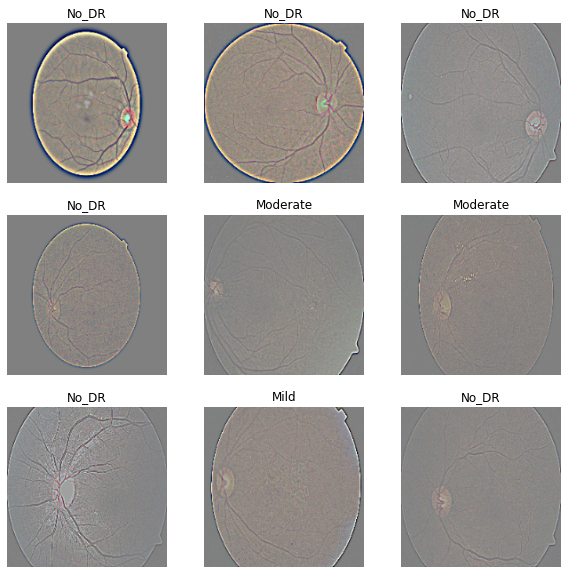

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    data.append(images)
    label.append(labels)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
"""normalization_layer = layers.Rescaling(1./255)"""

'normalization_layer = layers.Rescaling(1./255)'

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
92/92 [==============================] - 166s 2s/step - loss: 0.9363 - accuracy: 0.6614 - val_loss: 0.7855 - val_accuracy: 0.7090
Epoch 2/25
92/92 [==============================] - 84s 908ms/step - loss: 0.7749 - accuracy: 0.7212 - val_loss: 0.7827 - val_accuracy: 0.7117
Epoch 3/25
92/92 [==============================] - 83s 908ms/step - loss: 0.7192 - accuracy: 0.7433 - val_loss: 0.7623 - val_accuracy: 0.7063
Epoch 4/25
92/92 [==============================] - 82s 890ms/step - loss: 0.6817 - accuracy: 0.7512 - val_loss: 0.7270 - val_accuracy: 0.7213
Epoch 5/25
92/92 [==============================] - 84s 912ms/step - loss: 0.6348 - accuracy: 0.7648 - val_loss: 0.7235 - val_accuracy: 0.7432
Epoch 6/25
92/92 [==============================] - 82s 896ms/step - loss: 0.6048 - accuracy: 0.7809 - val_loss: 0.7619 - val_accuracy: 0.7281
Epoch 7/25
92/92 [==============================] - 84s 910ms/step - loss: 0.5487 - accuracy: 0.7956 - val_loss: 0.7145 - val_accuracy: 0.7582
E

In [ ]:
#x_path = tf.keras.utils.get_file('Image', origin='/content/drive/MyDrive/ML CLUB/Diabetic Retinopathy/gaussian_filtered_images/gaussian_filtered_images/No_DR/3abac0961bfd.png')

img = tf.keras.utils.load_img(
    '/content/drive/MyDrive/ML CLUB/Diabetic Retinopathy/gaussian_filtered_images/gaussian_filtered_images/No_DR/3abac0961bfd.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to No_DR with a 100.00 percent confidence.


In [ ]:
data = []
labels = []
width,height=180,180

imagePaths = list(paths.list_images('../content/drive/MyDrive/ML CLUB/Diabetic Retinopathy/gaussian_filtered_images'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    #print(imagePath)
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)
print(labels)
print(data.shape)
print(labels.shape)

[[0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [0 1 0 0 0]
 [0 0 1 0 0]]
(3662, 180, 180, 3)
(3662, 5)


In [ ]:
test_ratio = 0.25

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2746, 180, 180, 3)
Test images: (916, 180, 180, 3)
Train label: (2746, 5)
Test label: (916, 5)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[INFO] evaluating network...

Trainig Accuracy Score:- 92.35251274581209

Testing Accuracy Score:- 90.72052401746726

Traning Graph:- 
 


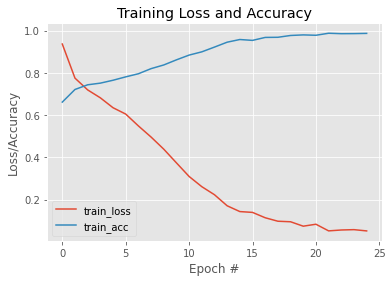

In [ ]:
!pip install scikit-plot

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = model.predict(x_train, batch_size=batch_size)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainCNNScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
CNNScore=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTrainig Accuracy Score:-",trainCNNScore)
print("\nTesting Accuracy Score:-",CNNScore)
print("\nTraning Graph:- \n ")

# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left",)
plt.show()

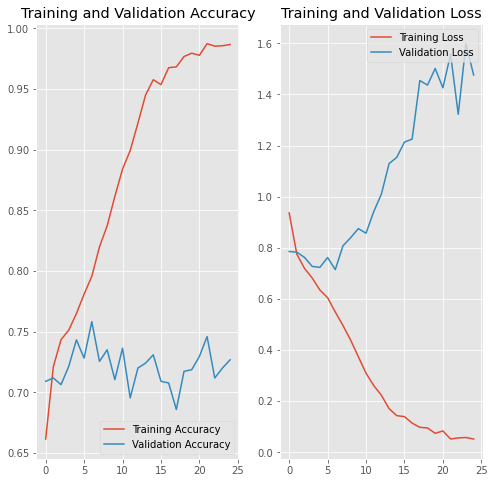

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
extractCNN = Model(model.inputs, model.layers[-2].output)

#del(data)
#del(labels)
feat_trainCNN  = extractCNN.predict(x_train)  
feat_testCNN = extractCNN.predict(x_test)      

print(feat_trainCNN.shape)

(2746, 128)


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainSVMScoreCNN=svm.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("SVM Training Accuracy Score:-",TrainSVMScoreCNN)

TestSVMScoreCNN=svm.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nSVM Testing Accuracy Score:-",TestSVMScoreCNN)

SVM Training Accuracy Score:- 94.79242534595775

SVM Testing Accuracy Score:- 88.97379912663756


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainDecisionScoreCNN=clf.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("Decision Tree Training Accuracy Score:-",TrainDecisionScoreCNN)


TestDecisionScoreCNN=clf.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nDecision Tree Testing Accuracy Score:-",TestDecisionScoreCNN)

Decision Tree Training Accuracy Score:- 99.2352512745812

Decision Tree Testing Accuracy Score:- 81.98689956331879


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainKNNScoreCNN=knn.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("KNN Training Accuracy Score:-",TrainKNNScoreCNN)

TestKNNScoreCNN=knn.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nKNN Testing Accuracy Score:-",TestKNNScoreCNN)

KNN Training Accuracy Score:- 93.44501092498179

KNN Testing Accuracy Score:- 89.51965065502183


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(feat_trainCNN,np.argmax(y_train,axis=1))

TrainNBScoreCNN=gnb.score(feat_trainCNN,np.argmax(y_train,axis=1))*100
print("\nGaussianNaive Bayes Training Accuracy Score:-",TrainNBScoreCNN)

TestNBScoreCNN=gnb.score(feat_testCNN,np.argmax(y_test,axis=1))*100
print("\nGaussianNaive Bayes Testing Accuracy Score:-",TestNBScoreCNN)


GaussianNaive Bayes Training Accuracy Score:- 85.06919155134742

GaussianNaive Bayes Testing Accuracy Score:- 84.60698689956332


In [ ]:
print("--Training Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(trainCNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TrainSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TrainDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TrainKNNScoreCNN))
print("CNN-NB Accuracy:- {:.2f} %".format(TrainNBScoreCNN))

print("\n--Testing Accuracy..")
print("CNN Accuracy:- {:.2f} %".format(CNNScore))
print("CNN-SVM Accuracy:- {:.2f} %".format(TestSVMScoreCNN))
print("CNN-DT Accuracy:- {:.2f} %".format(TestDecisionScoreCNN))
print("CNN-KNN Accuracy:- {:.2f} %".format(TestKNNScoreCNN))
print("CNN-NB Accuracy:- {:.2f} %".format(TestNBScoreCNN))

--Training Accuracy..
CNN Accuracy:- 92.35 %
CNN-SVM Accuracy:- 94.79 %
CNN-DT Accuracy:- 99.24 %
CNN-KNN Accuracy:- 93.45 %
CNN-NB Accuracy:- 85.07 %

--Testing Accuracy..
CNN Accuracy:- 90.72 %
CNN-SVM Accuracy:- 88.97 %
CNN-DT Accuracy:- 81.99 %
CNN-KNN Accuracy:- 89.52 %
CNN-NB Accuracy:- 84.61 %


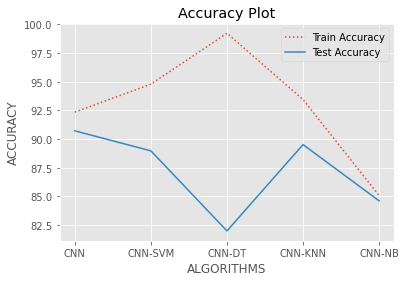

In [ ]:
trainpoints =  np.array([trainCNNScore,TrainSVMScoreCNN,TrainDecisionScoreCNN,TrainKNNScoreCNN,TrainNBScoreCNN])
testpoints = np.array([CNNScore,TestSVMScoreCNN,TestDecisionScoreCNN,TestKNNScoreCNN,TestNBScoreCNN])
labels=np.array(["CNN","CNN-SVM","CNN-DT","CNN-KNN","CNN-NB"])
plt.plot(labels,trainpoints, linestyle = 'dotted',label = "Train Accuracy")

plt.plot(labels,testpoints, linestyle = 'solid',label= "Test Accuracy")
plt.title("Accuracy Plot")
plt.xlabel("ALGORITHMS")
plt.ylabel("ACCURACY")
plt.legend()
plt.show()